In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

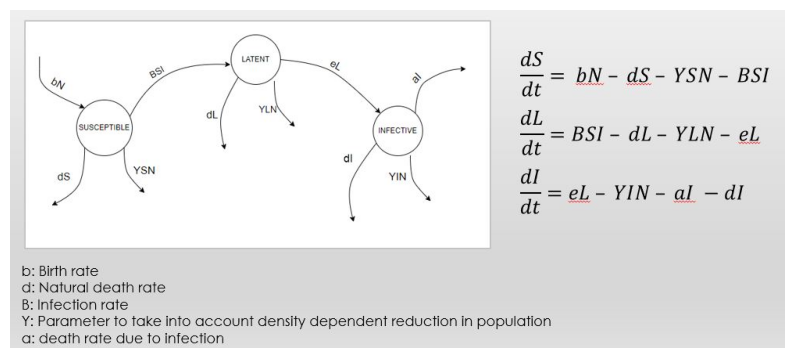

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 1, figsize=(10,30))
img = mpimg.imread(f"imgs/SLI model.JPG")
axs.imshow(img)
axs.set_axis_off()
plt.show()

[]

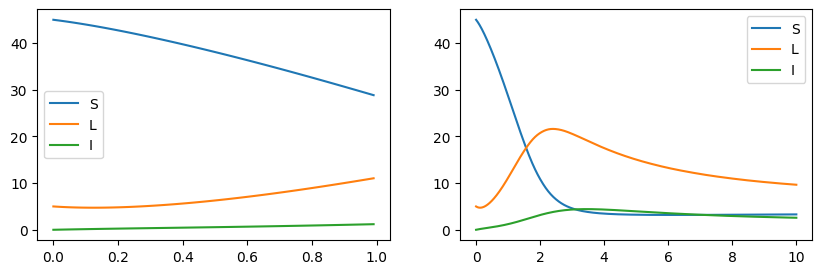

In [9]:
def sli_model(t, y, b, d, B, Y, a, e):
    """
    vu: birth rate per individual
    gamma: recovery rate per individual (includes natural deaths in R)
    mu: general natural death rate per individual
    beta: infection transmission rate
    """
    S, L, I = y
    N = S + L + I
    dS_dt = b * N - d * S - Y * S * N - B * S * I
    dL_dt = B * S * I - d * L - Y * L * N - e * L
    dI_dt = e * L - Y * I * N - a * I - d * I
    return [dS_dt, dL_dt, dI_dt]

b = 0.39
d = 0.125
B = 0.6
Y = 0.01
a = 0.9
e = 0.3

sol = solve_ivp(fun=sli_model, t_span=[0, 10], t_eval=np.linspace(0, 10, 1000), y0=[45, 5, 0], args=(b, d, B, Y, a, e))

fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.lineplot(x=sol.t[:100], y=sol.y[0][:100], label="S", ax=ax[0])
sns.lineplot(x=sol.t[:100], y=sol.y[1][:100], label="L", ax=ax[0])
sns.lineplot(x=sol.t[:100], y=sol.y[2][:100], label="I", ax=ax[0])
sns.lineplot(x=sol.t, y=sol.y[0], label="S", ax=ax[1])
sns.lineplot(x=sol.t, y=sol.y[1], label="L", ax=ax[1])
sns.lineplot(x=sol.t, y=sol.y[2], label="I", ax=ax[1])
plt.plot()

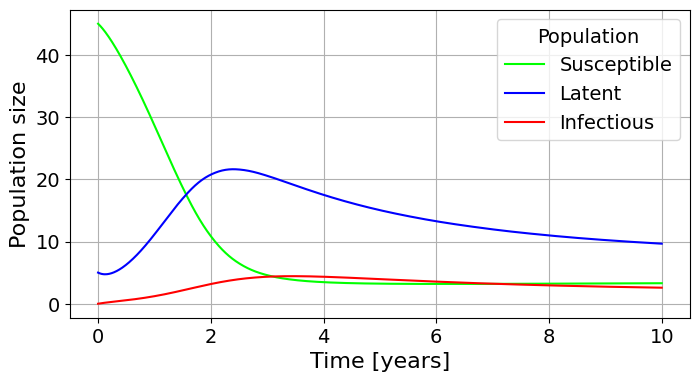

In [12]:
plt.figure(figsize=(8,4))
plt.grid(True)
sns.lineplot(x=sol.t, y=sol.y[0], label="Susceptible", color=[0, 1, 0])
sns.lineplot(x=sol.t, y=sol.y[1], label="Latent", color=[0, 0, 1])
sns.lineplot(x=sol.t, y=sol.y[2], label="Infectious", color=[1, 0, 0])
plt.ylabel("Population size", fontsize=16)
plt.xlabel("Time [years]", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, title="Population", title_fontsize=14)
plt.savefig(f"plots_presentation/simple_sli_model_example.svg", format='svg', bbox_inches="tight", pad_inches=0)